## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

# **1. Prepare dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

ModuleNotFoundError: No module named 'google'

In [ ]:
import shutil

shutil.copy("/content/gdrive/MyDrive/Documents/Rakamin id x partners/loan_data_2007_2014.csv", "/content/loan_data_2007_2014.csv")

'/content/loan_data_2007_2014.csv'

In [1]:
import pandas as pd
import numpy as np

In [2]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')
loan_data_backup.head()

C:\Users\rayno\miniconda3\envs\env_1\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan_data=loan_data_backup.copy()

In [4]:
pd.options.display.max_columns=None
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [5]:
loan_data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [6]:
loan_data.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


# **2. Data Cleaning**

## **Drop missing values**

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

In [8]:
loan_data.drop(columns=[
    "annual_inc_joint", "dti_joint", "verification_status_joint", "open_acc_6m", "open_il_6m",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", 
    "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", "inq_last_12m"
], inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

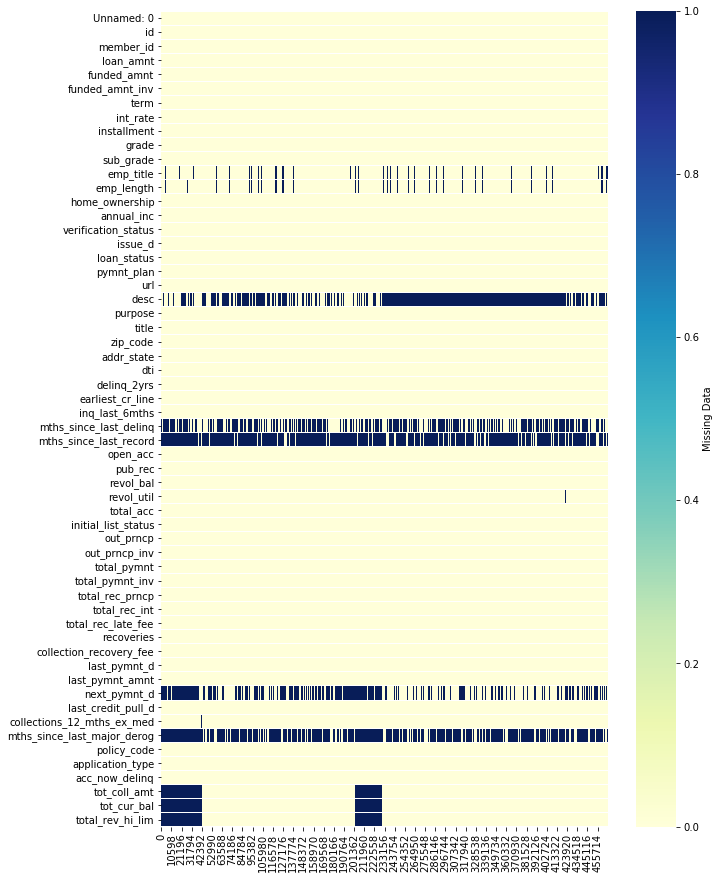

In [10]:
plt.figure(figsize=(10,15))
sns.heatmap(loan_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [11]:
loan_data.drop(columns=[
    "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", "mths_since_last_major_derog", "desc"
], inplace=True)

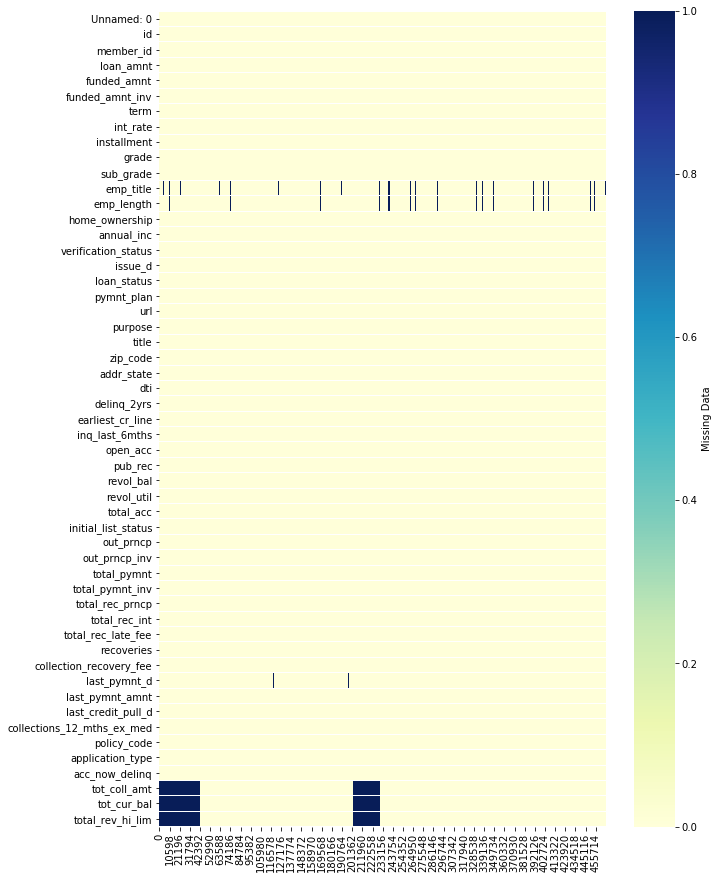

In [12]:
plt.figure(figsize=(10,15))
sns.heatmap(loan_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [13]:
loan_data.isnull().sum() 

Unnamed: 0                        0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths              

In [14]:
loan_data['verification_status'].value_counts()

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

In [15]:
loan_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].isnull().sum()

tot_coll_amt        70276
tot_cur_bal         70276
total_rev_hi_lim    70276
dtype: int64

In [16]:
loan_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','verification_status']]

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status
0,NaN,NaN,NaN,Verified
1,NaN,NaN,NaN,Source Verified
2,NaN,NaN,NaN,Not Verified
3,NaN,NaN,NaN,Source Verified
4,NaN,NaN,NaN,Source Verified
...,...,...,...,...
466280,0.0,294998.0,29900.0,Source Verified
466281,0.0,221830.0,39400.0,Verified
466282,0.0,73598.0,13100.0,Verified
466283,0.0,591610.0,53100.0,Verified


In [17]:
loan_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','verification_status']][(loan_data['verification_status']=='Not Verified')|(loan_data['verification_status']=='Source Verified')]

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status
1,NaN,NaN,NaN,Source Verified
2,NaN,NaN,NaN,Not Verified
3,NaN,NaN,NaN,Source Verified
4,NaN,NaN,NaN,Source Verified
5,NaN,NaN,NaN,Source Verified
...,...,...,...,...
466268,0.0,61201.0,32700.0,Source Verified
466274,0.0,9557.0,17100.0,Source Verified
466278,0.0,10170.0,11100.0,Source Verified
466279,0.0,20140.0,17600.0,Source Verified


In [18]:
loan_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','verification_status']][(loan_data['verification_status']=='Not Verified')|(loan_data['verification_status']=='Source Verified')].isnull().sum()

tot_coll_amt           46733
tot_cur_bal            46733
total_rev_hi_lim       46733
verification_status        0
dtype: int64

In [19]:
loan_data[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim','verification_status']][(loan_data['verification_status']=='Verified')].isnull().sum()

tot_coll_amt           23543
tot_cur_bal            23543
total_rev_hi_lim       23543
verification_status        0
dtype: int64

In [20]:
loan_data.isnull().sum()

Unnamed: 0                        0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths              

In [21]:
import missingno as msno

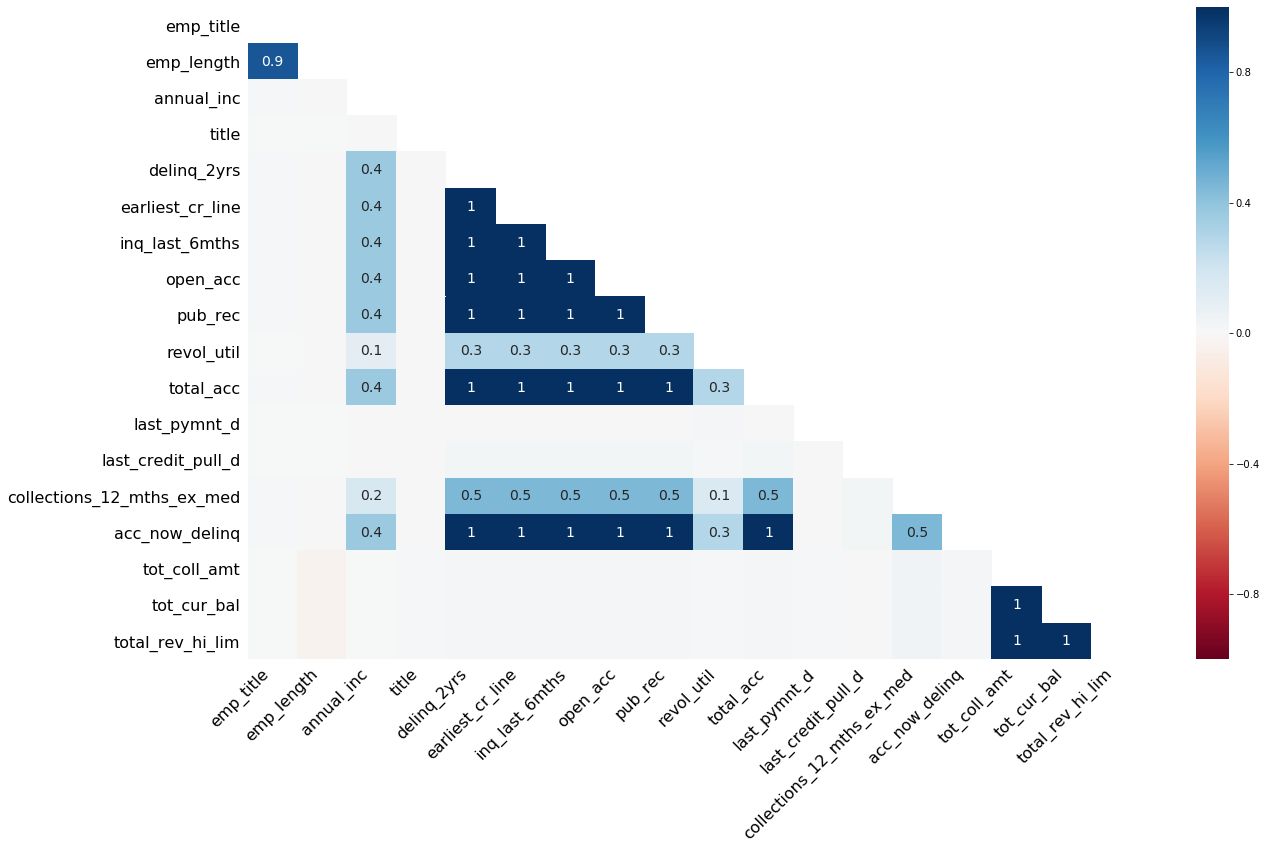

In [22]:
msno.heatmap(loan_data)

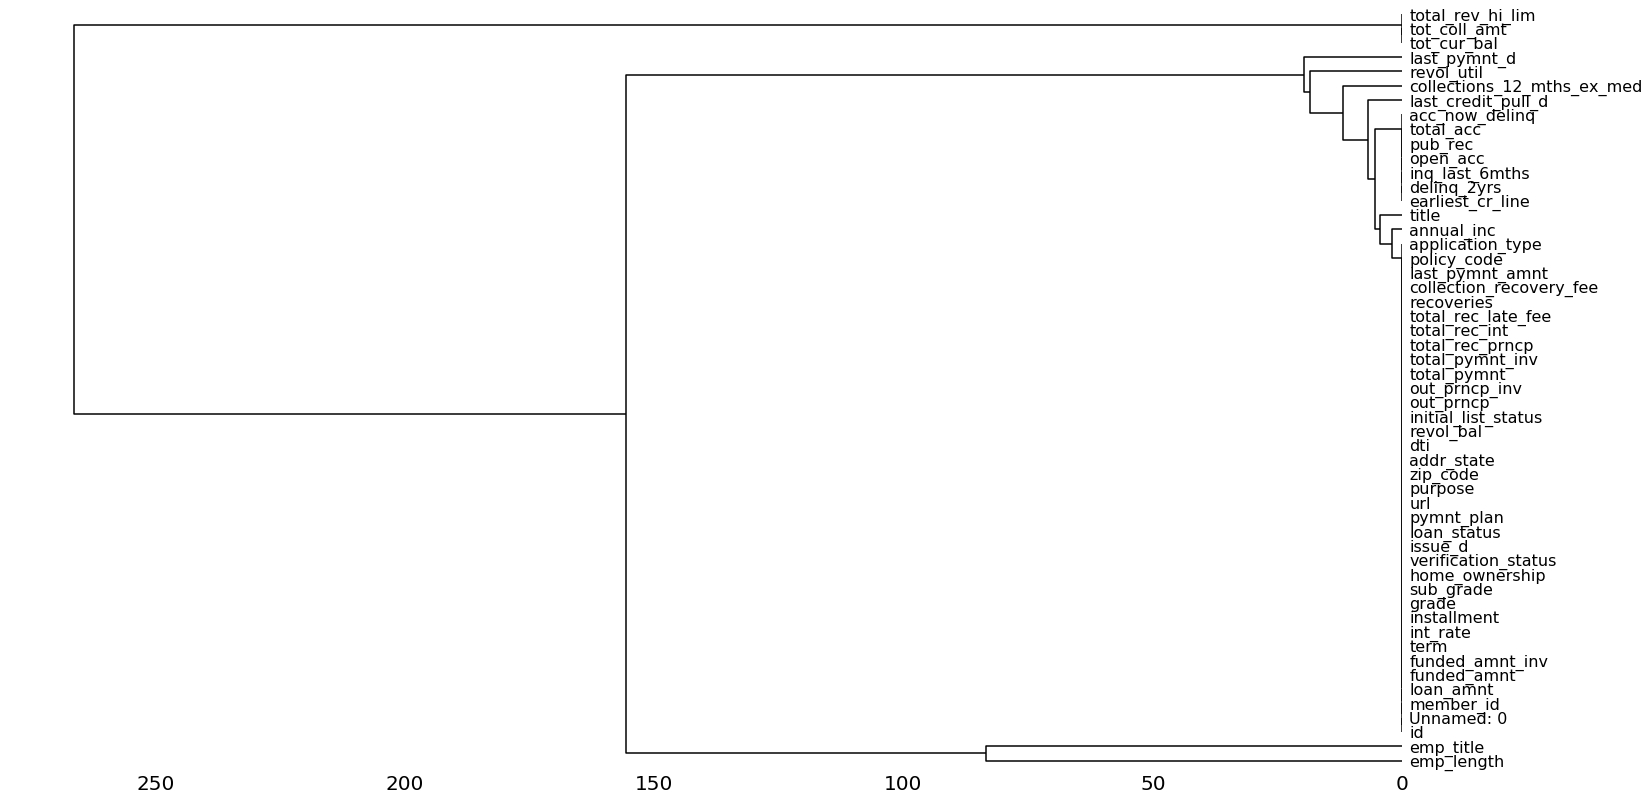

In [23]:
msno.dendrogram(loan_data)

In [24]:
loan_data.dropna(subset=[
    'emp_length', 'title', 'last_pymnt_d', 'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
], inplace=True)

In [25]:
loan_data.isnull().sum()

Unnamed: 0                       0
id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     4409
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc            

In [26]:
loan_data['revol_util'].unique()

array([ 61.2,  52.8,  21.6, ..., 111.3, 113. , 141.8])

In [27]:
loan_data.shape

(376775, 53)

## **Impute nilai NaN** 

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(loan_data[['revol_util']])
loan_data['revol_util'] = imp_mean.transform(loan_data[['revol_util']])

imp_frek = SimpleImputer(strategy='most_frequent')
imp_frek.fit(loan_data[['emp_title']])
loan_data['emp_title'] = imp_frek.transform(loan_data[['emp_title']])
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,42535,10149342,12000897,27050,27050,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-86,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,42536,10159584,12011200,9750,9750,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,1 year,RENT,26000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt Consilation,927xx,CA,25.12,0.0,Jan-07,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,42537,10159498,1319523,12000,12000,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-94,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,42538,10139658,11991209,12000,12000,12000.0,36 months,13.53,407.40,B,B5,On road manager,10+ years,RENT,40000.0,Source Verified,Dec-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,871xx,NM,16.94,0.0,Oct-98,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Jan-16,0.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,42539,10159548,12011167,15000,15000,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-98,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Jan-16,0.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


In [30]:
loan_data.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

## **drop colom yang tidak dipakai**

In [31]:
loan_data.duplicated().sum()

0

In [32]:
loan_data['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [33]:
loan_data['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [34]:
loan_data['policy_code'].unique()

array([1], dtype=int64)

In [35]:
loan_data.drop(columns=[
    "Unnamed: 0", "id", "member_id", "url", "zip_code", "addr_state", "application_type", "policy_code", "sub_grade"
], inplace=True)

loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,27050.0,36 months,10.99,885.46,B,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,Dec-13,Current,n,debt_consolidation,Debt Consolidation,22.87,0.0,Oct-86,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,0.0,Jan-16,885.46,Dec-15,0.0,0.0,0.0,114834.0,59900.0
42536,9750,9750,9750.0,36 months,13.98,333.14,C,Medical Assistant,1 year,RENT,26000.0,Not Verified,Dec-13,Current,n,debt_consolidation,Debt Consilation,25.12,0.0,Jan-07,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,0.0,Jan-16,333.14,Jan-16,0.0,0.0,0.0,14123.0,15100.0
42537,12000,12000,12000.0,36 months,6.62,368.45,A,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,debt_consolidation,UNIVERSAL CARD,14.05,0.0,Mar-94,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-16,368.45,Jan-16,0.0,0.0,0.0,267646.0,61100.0
42538,12000,12000,12000.0,36 months,13.53,407.40,B,On road manager,10+ years,RENT,40000.0,Source Verified,Dec-13,Fully Paid,n,debt_consolidation,Debt consolidation,16.94,0.0,Oct-98,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,0.0,Sep-15,119.17,Jan-16,0.0,0.0,15386.0,13605.0,8100.0
42539,15000,15000,15000.0,36 months,8.90,476.30,A,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-13,Current,n,debt_consolidation,Pay off,16.51,0.0,Mar-98,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-16,476.30,Jan-16,0.0,0.0,1514.0,272492.0,15400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,debt_consolidation,Debt consolidation,19.85,0.0,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Jan-16,0.0,0.0,0.0,294998.0,29900.0
466281,22000,22000,22000.0,60 months,19.97,582.50,D,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,debt_consolidation,Debt consolidation,18.45,0.0,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,Jan-16,0.0,0.0,0.0,221830.0,39400.0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,debt_consolidation,Debt consolidation,25.65,0.0,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Dec-15,0.0,0.0,0.0,73598.0,13100.0
466283,2000,2000,2000.0,36 months,7.90,62.59,A,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,credit_card,Credit card refinancing,5.39,3.0,Feb-03,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,Apr-15,0.0,0.0,0.0,591610.0,53100.0


## **Ubah format tanggal menjadi total jumlah hari**

### data earliest_cr_line

In [36]:
loan_data['earliest_cr_line']

42535     Oct-86
42536     Jan-07
42537     Mar-94
42538     Oct-98
42539     Mar-98
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 376775, dtype: object

In [37]:
# ubah string to time stamp
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
# %b returns the first 3 letters in a month
# %y returns the last 2 digits of the year

In [38]:
loan_data['earliest_cr_line_date']

42535    1986-10-01
42536    2007-01-01
42537    1994-03-01
42538    1998-10-01
42539    1998-03-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 376775, dtype: datetime64[ns]

In [39]:
# beda waktu per 2022 (days)
pd.to_datetime('2022-01-01')-loan_data['earliest_cr_line_date']

42535    12876 days
42536     5479 days
42537    10168 days
42538     8493 days
42539     8707 days
            ...    
466280    6850 days
466281    8980 days
466282    7336 days
466283    6909 days
466284    8005 days
Name: earliest_cr_line_date, Length: 376775, dtype: timedelta64[ns]

In [40]:
round((pd.to_datetime('2022-01-01')-loan_data['earliest_cr_line_date'])/ np.timedelta64(1, 'M'))

42535     423.0
42536     180.0
42537     334.0
42538     279.0
42539     286.0
          ...  
466280    225.0
466281    295.0
466282    241.0
466283    227.0
466284    263.0
Name: earliest_cr_line_date, Length: 376775, dtype: float64

In [41]:
# get the time difference (months) and round to whole number integers
loan_data['earliest_cr_line'] = round((pd.to_datetime('2022-01-01')-loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M'))

loan_data['earliest_cr_line'].describe()

count    376775.000000
mean        286.027231
std          89.658385
min        -563.000000
25%         231.000000
50%         271.000000
75%         331.000000
max         636.000000
Name: earliest_cr_line, dtype: float64

In [42]:
# locate the date difference less tha zero
loan_data.loc[:, ['earliest_cr_line_date', 'earliest_cr_line']][loan_data['earliest_cr_line'] < 0]

,earliest_cr_line_date,earliest_cr_line
43163,2068-10-01,-561.0
43378,2067-08-01,-547.0
43556,2067-07-01,-546.0
46180,2061-01-01,-468.0
46245,2065-05-01,-520.0
...,...,...
463508,2068-04-01,-555.0
463849,2060-06-01,-461.0
464260,2066-07-01,-534.0
465100,2067-10-01,-549.0


In [43]:
# we assign all observations with values less zero with the maximum of the months since earliest cr line
loan_data['earliest_cr_line'][loan_data['earliest_cr_line'] < 0] = loan_data['earliest_cr_line'].max()

C:\Users\rayno\miniconda3\envs\env_1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
min(loan_data['earliest_cr_line'])

122.0

In [45]:
loan_data['earliest_cr_line'].describe()

count    376775.000000
mean        287.995501
std          84.453373
min         122.000000
25%         231.000000
50%         272.000000
75%         331.000000
max         636.000000
Name: earliest_cr_line, dtype: float64

In [46]:
loan_data.loc[:, ['earliest_cr_line_date', 'earliest_cr_line']]

,earliest_cr_line_date,earliest_cr_line
42535,1986-10-01,423.0
42536,2007-01-01,180.0
42537,1994-03-01,334.0
42538,1998-10-01,279.0
42539,1998-03-01,286.0
...,...,...
466280,2003-04-01,225.0
466281,1997-06-01,295.0
466282,2001-12-01,241.0
466283,2003-02-01,227.0


In [47]:
loan_data.drop(columns=[
    "earliest_cr_line_date"
], inplace=True)

### issue_d

In [48]:
loan_data['issue_d']

42535     Dec-13
42536     Dec-13
42537     Dec-13
42538     Dec-13
42539     Dec-13
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 376775, dtype: object

In [49]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [50]:
loan_data['issue_d_date']

42535    2013-12-01
42536    2013-12-01
42537    2013-12-01
42538    2013-12-01
42539    2013-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d_date, Length: 376775, dtype: datetime64[ns]

In [51]:
pd.to_datetime('2022-01-01')-loan_data['issue_d_date']

42535    2953 days
42536    2953 days
42537    2953 days
42538    2953 days
42539    2953 days
            ...   
466280   2922 days
466281   2922 days
466282   2922 days
466283   2922 days
466284   2922 days
Name: issue_d_date, Length: 376775, dtype: timedelta64[ns]

In [52]:
# time difference in months
loan_data['issue_d'] = round((pd.to_datetime('2022-01-01')-loan_data['issue_d_date']) / np.timedelta64(1, 'M'))

In [53]:
loan_data.loc[:, ['issue_d_date', 'issue_d']][loan_data['issue_d'] < 0]

,issue_d_date,issue_d


In [54]:
loan_data['issue_d'].describe()

count    376775.000000
mean         95.442028
std           7.419899
min          85.000000
25%          89.000000
50%          94.000000
75%         101.000000
max         113.000000
Name: issue_d, dtype: float64

In [55]:
min(loan_data['issue_d'])

85.0

In [56]:
loan_data.loc[:, ['issue_d_date', 'issue_d']]

,issue_d_date,issue_d
42535,2013-12-01,97.0
42536,2013-12-01,97.0
42537,2013-12-01,97.0
42538,2013-12-01,97.0
42539,2013-12-01,97.0
...,...,...
466280,2014-01-01,96.0
466281,2014-01-01,96.0
466282,2014-01-01,96.0
466283,2014-01-01,96.0


In [57]:
loan_data.drop(columns=[
    "issue_d_date"
], inplace=True)

### last_pymnt_d

In [58]:
loan_data['last_pymnt_d']

42535     Jan-16
42536     Jan-16
42537     Jan-16
42538     Sep-15
42539     Jan-16
           ...  
466280    Jan-16
466281    Dec-14
466282    Jan-16
466283    Dec-14
466284    Jan-16
Name: last_pymnt_d, Length: 376775, dtype: object

In [59]:
loan_data['last_pymnt_d_date'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')

In [60]:
pd.to_datetime('2022-01-01')-loan_data['last_pymnt_d_date']

42535    2192 days
42536    2192 days
42537    2192 days
42538    2314 days
42539    2192 days
            ...   
466280   2192 days
466281   2588 days
466282   2192 days
466283   2588 days
466284   2192 days
Name: last_pymnt_d_date, Length: 376775, dtype: timedelta64[ns]

In [61]:
loan_data['last_pymnt_d'] = round((pd.to_datetime('2022-01-01')-loan_data['last_pymnt_d_date']) / np.timedelta64(1, 'M'))

In [62]:
loan_data.loc[:, ['last_pymnt_d_date', 'last_pymnt_d']][loan_data['last_pymnt_d'] < 0]

,last_pymnt_d_date,last_pymnt_d


In [63]:
min(loan_data['last_pymnt_d'])

72.0

In [64]:
loan_data.loc[:, ['last_pymnt_d_date', 'last_pymnt_d']]

,last_pymnt_d_date,last_pymnt_d
42535,2016-01-01,72.0
42536,2016-01-01,72.0
42537,2016-01-01,72.0
42538,2015-09-01,76.0
42539,2016-01-01,72.0
...,...,...
466280,2016-01-01,72.0
466281,2014-12-01,85.0
466282,2016-01-01,72.0
466283,2014-12-01,85.0


In [65]:
loan_data.drop(columns=[
    "last_pymnt_d_date"
], inplace=True)

### last_credit_pull_d

In [66]:
loan_data['last_credit_pull_d']

42535     Dec-15
42536     Jan-16
42537     Jan-16
42538     Jan-16
42539     Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 376775, dtype: object

In [67]:
loan_data['last_credit_pull_d_date'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%b-%y')

In [68]:
loan_data['last_credit_pull_d'] = round((pd.to_datetime('2022-01-01')-loan_data['last_credit_pull_d_date']) / np.timedelta64(1, 'M'))

In [69]:
loan_data.loc[:, ['last_credit_pull_d', 'last_credit_pull_d_date', 'last_credit_pull_d']][loan_data['last_credit_pull_d'] < 0]

,last_credit_pull_d,last_credit_pull_d_date,last_credit_pull_d


In [70]:
loan_data.loc[:, ['last_credit_pull_d_date', 'last_credit_pull_d']]

,last_credit_pull_d_date,last_credit_pull_d
42535,2015-12-01,73.0
42536,2016-01-01,72.0
42537,2016-01-01,72.0
42538,2016-01-01,72.0
42539,2016-01-01,72.0
...,...,...
466280,2016-01-01,72.0
466281,2016-01-01,72.0
466282,2015-12-01,73.0
466283,2015-04-01,81.0


In [71]:
loan_data.drop(columns=[
    "last_credit_pull_d_date"
], inplace=True)

# **3. EDA**

## Buat kolom baru untuk Target

In [95]:
loan_data['loan_status'].unique()

KeyError: 'loan_status'

In [73]:
loan_data['loan_status'].value_counts()

Current               209031
Fully Paid            126182
Charged Off            30311
Late (31-120 days)      6380
In Grace Period         2980
Late (16-30 days)       1124
Default                  767
Name: loan_status, dtype: int64

In [74]:
# melihat proporsi nilai dari jumlah data
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current               0.554790
Fully Paid            0.334900
Charged Off           0.080449
Late (31-120 days)    0.016933
In Grace Period       0.007909
Late (16-30 days)     0.002983
Default               0.002036
Name: loan_status, dtype: float64

In [75]:
# buat colom bad good untuk data label berdasarkan loan_status
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin([
    'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default'
]), 0, 1)

In [76]:
loan_data['good_bad'].value_counts()

1    338193
0     38582
Name: good_bad, dtype: int64

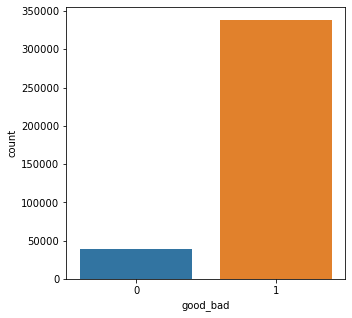

In [77]:
plt.figure(figsize=(5, 5))
sns.countplot(data=loan_data, x='good_bad')
plt.show()

In [78]:
loan_data.drop(columns=[
    'loan_status'
],
inplace=True)

In [79]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
42535,27050,27050,27050.0,36 months,10.99,885.46,B,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,97.0,n,debt_consolidation,Debt Consolidation,22.87,0.0,423.0,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,72.0,885.46,73.0,0.0,0.0,0.0,114834.0,59900.0,1
42536,9750,9750,9750.0,36 months,13.98,333.14,C,Medical Assistant,1 year,RENT,26000.0,Not Verified,97.0,n,debt_consolidation,Debt Consilation,25.12,0.0,180.0,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,72.0,333.14,72.0,0.0,0.0,0.0,14123.0,15100.0,1
42537,12000,12000,12000.0,36 months,6.62,368.45,A,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,97.0,n,debt_consolidation,UNIVERSAL CARD,14.05,0.0,334.0,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,72.0,368.45,72.0,0.0,0.0,0.0,267646.0,61100.0,1
42538,12000,12000,12000.0,36 months,13.53,407.40,B,On road manager,10+ years,RENT,40000.0,Source Verified,97.0,n,debt_consolidation,Debt consolidation,16.94,0.0,279.0,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,76.0,119.17,72.0,0.0,0.0,15386.0,13605.0,8100.0,1
42539,15000,15000,15000.0,36 months,8.90,476.30,A,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,97.0,n,debt_consolidation,Pay off,16.51,0.0,286.0,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,72.0,476.30,72.0,0.0,0.0,1514.0,272492.0,15400.0,1


In [80]:
loan_data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                       float64
pymnt_plan                     object
purpose                        object
title                          object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp   

In [81]:
cat_data = pd.DataFrame(loan_data, columns=list(loan_data.select_dtypes(include=['object']).columns))
cat_data.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,Team Leadern Customer Ops & Systems,10+ years,OWN,Verified,n,debt_consolidation,Debt Consolidation,w
42536,36 months,C,Medical Assistant,1 year,RENT,Not Verified,n,debt_consolidation,Debt Consilation,f
42537,36 months,A,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,Not Verified,n,debt_consolidation,UNIVERSAL CARD,w
42538,36 months,B,On road manager,10+ years,RENT,Source Verified,n,debt_consolidation,Debt consolidation,w
42539,36 months,A,aircraft maintenance engineer,2 years,MORTGAGE,Not Verified,n,debt_consolidation,Pay off,w


### agregate data home_ownership

In [82]:
cat_data["home_ownership"].value_counts()

MORTGAGE    195522
RENT        148230
OWN          32939
OTHER           42
NONE            41
ANY              1
Name: home_ownership, dtype: int64

In [83]:
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
cat_data["home_ownership"] = cat_data["home_ownership"].map(target_dict)

In [84]:
cat_data["home_ownership"].value_counts()

MORTGAGE    195522
RENT        148230
OWN          32939
OTHER           84
Name: home_ownership, dtype: int64

In [85]:
cat_data.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,Team Leadern Customer Ops & Systems,10+ years,OWN,Verified,n,debt_consolidation,Debt Consolidation,w
42536,36 months,C,Medical Assistant,1 year,RENT,Not Verified,n,debt_consolidation,Debt Consilation,f
42537,36 months,A,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,Not Verified,n,debt_consolidation,UNIVERSAL CARD,w
42538,36 months,B,On road manager,10+ years,RENT,Source Verified,n,debt_consolidation,Debt consolidation,w
42539,36 months,A,aircraft maintenance engineer,2 years,MORTGAGE,Not Verified,n,debt_consolidation,Pay off,w


In [86]:
cat_data['purpose'].value_counts()

debt_consolidation    228540
credit_card            88596
home_improvement       20292
other                  16365
major_purchase          6357
small_business          3978
medical                 3285
car                     3040
moving                  1998
vacation                1772
house                   1500
wedding                  855
renewable_energy         197
Name: purpose, dtype: int64

In [87]:
cat_data['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding'], dtype=object)

In [88]:
target_dict = {
    'debt_consolidation':'debt_consolidation', 
    'other':'other', 
    'credit_card':'credit_card',
    'small_business':'small_business', 
    'major_purchase':'major_purchase',
    'medical':'medical',
    'renewable_energy':'renewable_energy',
    'vacation':'vacation',
    
    'house':'personal',
    'wedding':'personal',
    'home_improvement':'personal',
    'car':'personal',
    'moving':'personal'
}
cat_data["purpose"] = cat_data["purpose"].map(target_dict)
cat_data["purpose"].value_counts()

debt_consolidation    228540
credit_card            88596
personal               27685
other                  16365
major_purchase          6357
small_business          3978
medical                 3285
vacation                1772
renewable_energy         197
Name: purpose, dtype: int64

In [89]:
len(cat_data['emp_title'].unique().tolist()), len(cat_data['title'].unique().tolist())

(166136, 37412)

In [90]:
cat_data.drop([
    "emp_title", "title"
], inplace=True, axis=1)
cat_data.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status
42535,36 months,B,10+ years,OWN,Verified,n,debt_consolidation,w
42536,36 months,C,1 year,RENT,Not Verified,n,debt_consolidation,f
42537,36 months,A,10+ years,MORTGAGE,Not Verified,n,debt_consolidation,w
42538,36 months,B,10+ years,RENT,Source Verified,n,debt_consolidation,w
42539,36 months,A,2 years,MORTGAGE,Not Verified,n,debt_consolidation,w


In [91]:
cat_data_a = pd.concat([
    cat_data,
    loan_data[
        ["delinq_2yrs", "inq_last_6mths", "acc_now_delinq", "good_bad"]
    ]
], axis=1)
cat_data_a.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,delinq_2yrs,inq_last_6mths,acc_now_delinq,good_bad
42535,36 months,B,10+ years,OWN,Verified,n,debt_consolidation,w,0.0,0.0,0.0,1
42536,36 months,C,1 year,RENT,Not Verified,n,debt_consolidation,f,0.0,0.0,0.0,1
42537,36 months,A,10+ years,MORTGAGE,Not Verified,n,debt_consolidation,w,0.0,1.0,0.0,1
42538,36 months,B,10+ years,RENT,Source Verified,n,debt_consolidation,w,0.0,0.0,0.0,1
42539,36 months,A,2 years,MORTGAGE,Not Verified,n,debt_consolidation,w,0.0,0.0,0.0,1


In [92]:
num_data = pd.DataFrame(loan_data, columns=list(loan_data.select_dtypes(include=np.number).columns))

# hapus data yang non kontinu
num_data_c = num_data.copy()
num_data_c.drop([
    "delinq_2yrs", "inq_last_6mths", "acc_now_delinq", "good_bad"
], inplace=True, axis=1)

num_data_c.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,27050.0,10.99,885.46,55000.0,97.0,22.87,423.0,14.0,0.0,36638,61.2,27.0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,72.0,885.46,73.0,0.0,0.0,114834.0,59900.0
42536,9750,9750,9750.0,13.98,333.14,26000.0,97.0,25.12,180.0,12.0,0.0,7967,52.8,28.0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,72.0,333.14,72.0,0.0,0.0,14123.0,15100.0
42537,12000,12000,12000.0,6.62,368.45,105000.0,97.0,14.05,334.0,12.0,0.0,13168,21.6,22.0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,72.0,368.45,72.0,0.0,0.0,267646.0,61100.0
42538,12000,12000,12000.0,13.53,407.40,40000.0,97.0,16.94,279.0,7.0,2.0,5572,68.8,32.0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,76.0,119.17,72.0,0.0,15386.0,13605.0,8100.0
42539,15000,15000,15000.0,8.90,476.30,63000.0,97.0,16.51,286.0,8.0,0.0,11431,74.2,29.0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,72.0,476.30,72.0,0.0,1514.0,272492.0,15400.0


In [93]:
num_data_c.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,3.767750e+05,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,3.767750e+05,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,3.767750e+05,3.767750e+05,3.767750e+05
mean,14890.146307,14890.105965,14883.558596,14.040627,449.124251,7.527845e+04,95.442028,17.671009,287.995501,11.507741,0.174006,1.671960e+04,57.005949,25.595589,5190.443736,5188.701727,11455.233674,11449.643864,8735.461209,2638.763254,0.546909,80.462307,8.426923,76.907876,3228.236584,74.100999,0.010619,1.889367e+02,1.411506e+05,3.056251e+04
std,8314.904597,8314.858430,8311.591182,4.384149,244.074136,5.529303e+04,7.419899,7.850308,84.453373,5.039896,0.537887,2.115223e+04,22.932820,11.587857,6651.989056,6650.095735,8083.613729,8079.275455,6999.016694,2429.592529,4.869983,522.392389,73.740570,7.465341,5740.531019,5.202126,0.117485,1.499174e+04,1.533752e+05,3.769584e+04
min,1000.000000,1000.000000,950.000000,6.000000,23.260000,4.000000e+03,85.000000,0.000000,122.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,35.690000,35.690000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.010000,72.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8500.000000,8500.000000,8500.000000,10.990000,272.980000,4.700000e+04,89.000000,11.770000,231.000000,8.000000,0.000000,6.790000e+03,40.600000,17.000000,0.000000,0.000000,5597.370000,5594.720000,3652.575000,1020.150000,0.000000,0.000000,0.000000,72.000000,324.130000,72.000000,0.000000,0.000000e+00,2.960600e+04,1.370000e+04
50%,13200.000000,13200.000000,13200.000000,13.980000,396.200000,6.500000e+04,94.000000,17.280000,272.000000,11.000000,0.000000,1.221100e+04,58.100000,24.000000,2344.560000,2343.640000,9377.600000,9372.880000,6601.780000,1896.680000,0.000000,0.000000,0.000000,73.000000,550.390000,72.000000,0.000000,0.000000e+00,8.467600e+04,2.300000e+04
75%,20000.000000,20000.000000,20000.000000,16.990000,586.240000,9.000000e+04,101.000000,23.310000,331.000000,14.000000,0.000000,2.092300e+04,74.800000,32.000000,8793.065000,8788.100000,15141.157130,15132.635000,11774.615000,3388.685000,0.000000,0.000000,0.000000,80.000000,3255.580000,72.000000,0.000000,0.000000e+00,2.120920e+05,3.810000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,113.000000,39.990000,636.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,56087.909920,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,5694.093600,112.000000,36234.440000,113.000000,20.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [94]:
num_data[['loan_amnt']]

,loan_amnt
42535,27050
42536,9750
42537,12000
42538,12000
42539,15000
...,...
466280,18400
466281,22000
466282,20700
466283,2000


In [96]:
def DSTplot(col):
    fig, axes = plt.subplots(len(col)//3, 3, figsize=(40, 20))
    for d, ax in zip(col, axes.flatten()):
        p = sns.distplot(num_data_c.loc[(loan_data["good_bad"]==0), d], color="r", label="Bad", ax=ax)
        p = sns.distplot(num_data_c.loc[(loan_data["good_bad"]==1), d], color="g", label="Good", ax=ax)
        p.set_xlabel(d, fontsize = 15)
        p.set_ylabel("Density", fontsize = 15)
    return plt.show()

In [97]:
def CNTplot(col):
    fig, axes = plt.subplots(len(col)//3, 3, figsize=(40, 20))
    for d, ax in zip(col, axes.flatten()):
        p = sns.countplot(data=cat_data_a, x=d, hue='good_bad', ax=ax)
        p.set_xlabel(d, fontsize = 15)
        p.set_ylabel("Count", fontsize = 15)
    return plt.show()

In [98]:
def BOXplot(df):
    fig, axes = plt.subplots(df.shape[0]//3, 3, figsize=(40, 20))
    for d, ax in zip(df.columns.tolist(), axes.flatten()):
        p = sns.boxplot(x=df[d], ax=ax)
        p.set_xlabel(d, fontsize = 15)
    return plt.show()

## Plot data kategorik vs target

In [99]:
cat_data_a.columns.tolist()

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'delinq_2yrs',
 'inq_last_6mths',
 'acc_now_delinq',
 'good_bad']

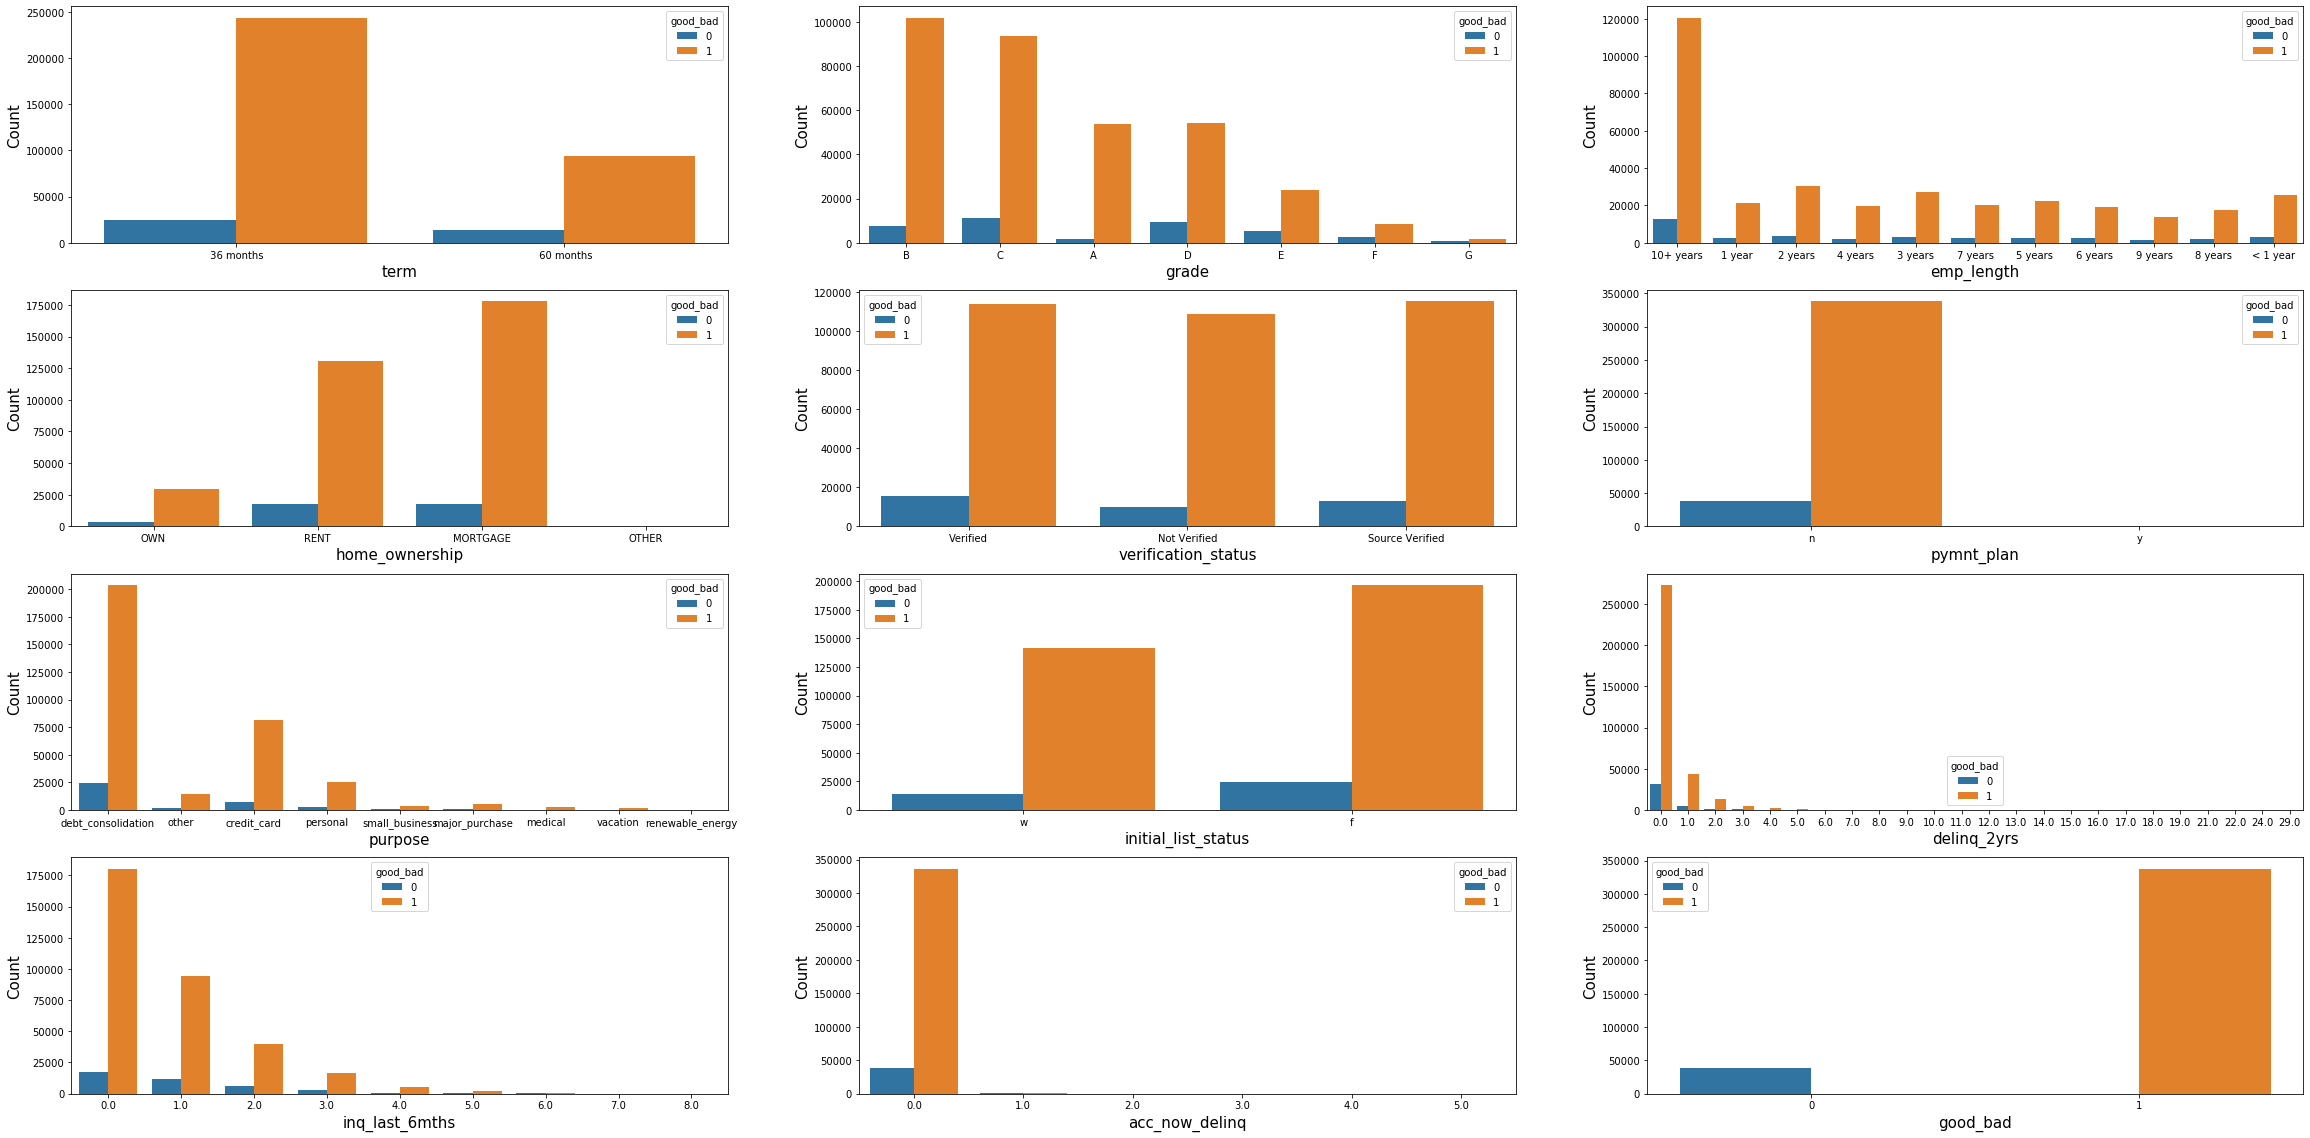

In [100]:
CNTplot(cat_data_a.columns.tolist())

In [101]:
cat_data_a['pymnt_plan'].value_counts()

n    376770
y         5
Name: pymnt_plan, dtype: int64

In [102]:
cat_data_a['acc_now_delinq'].value_counts()

0.0    375121
1.0      1550
2.0        87
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

In [103]:
cat_data_a['inq_last_6mths'].value_counts()

0.0    197675
1.0    105650
2.0     45728
3.0     19150
4.0      5760
5.0      2019
6.0       789
7.0         3
8.0         1
Name: inq_last_6mths, dtype: int64

In [104]:
cat_data_a.drop(["pymnt_plan"], inplace=True, axis=1)
cat_data_a.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,delinq_2yrs,inq_last_6mths,acc_now_delinq,good_bad
42535,36 months,B,10+ years,OWN,Verified,debt_consolidation,w,0.0,0.0,0.0,1
42536,36 months,C,1 year,RENT,Not Verified,debt_consolidation,f,0.0,0.0,0.0,1
42537,36 months,A,10+ years,MORTGAGE,Not Verified,debt_consolidation,w,0.0,1.0,0.0,1
42538,36 months,B,10+ years,RENT,Source Verified,debt_consolidation,w,0.0,0.0,0.0,1
42539,36 months,A,2 years,MORTGAGE,Not Verified,debt_consolidation,w,0.0,0.0,0.0,1


## Plot data numerik vs target

In [105]:
len(num_data_c.columns.tolist())

30

In [106]:
num_data_c.columns[:15].tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'issue_d',
 'dti',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp']

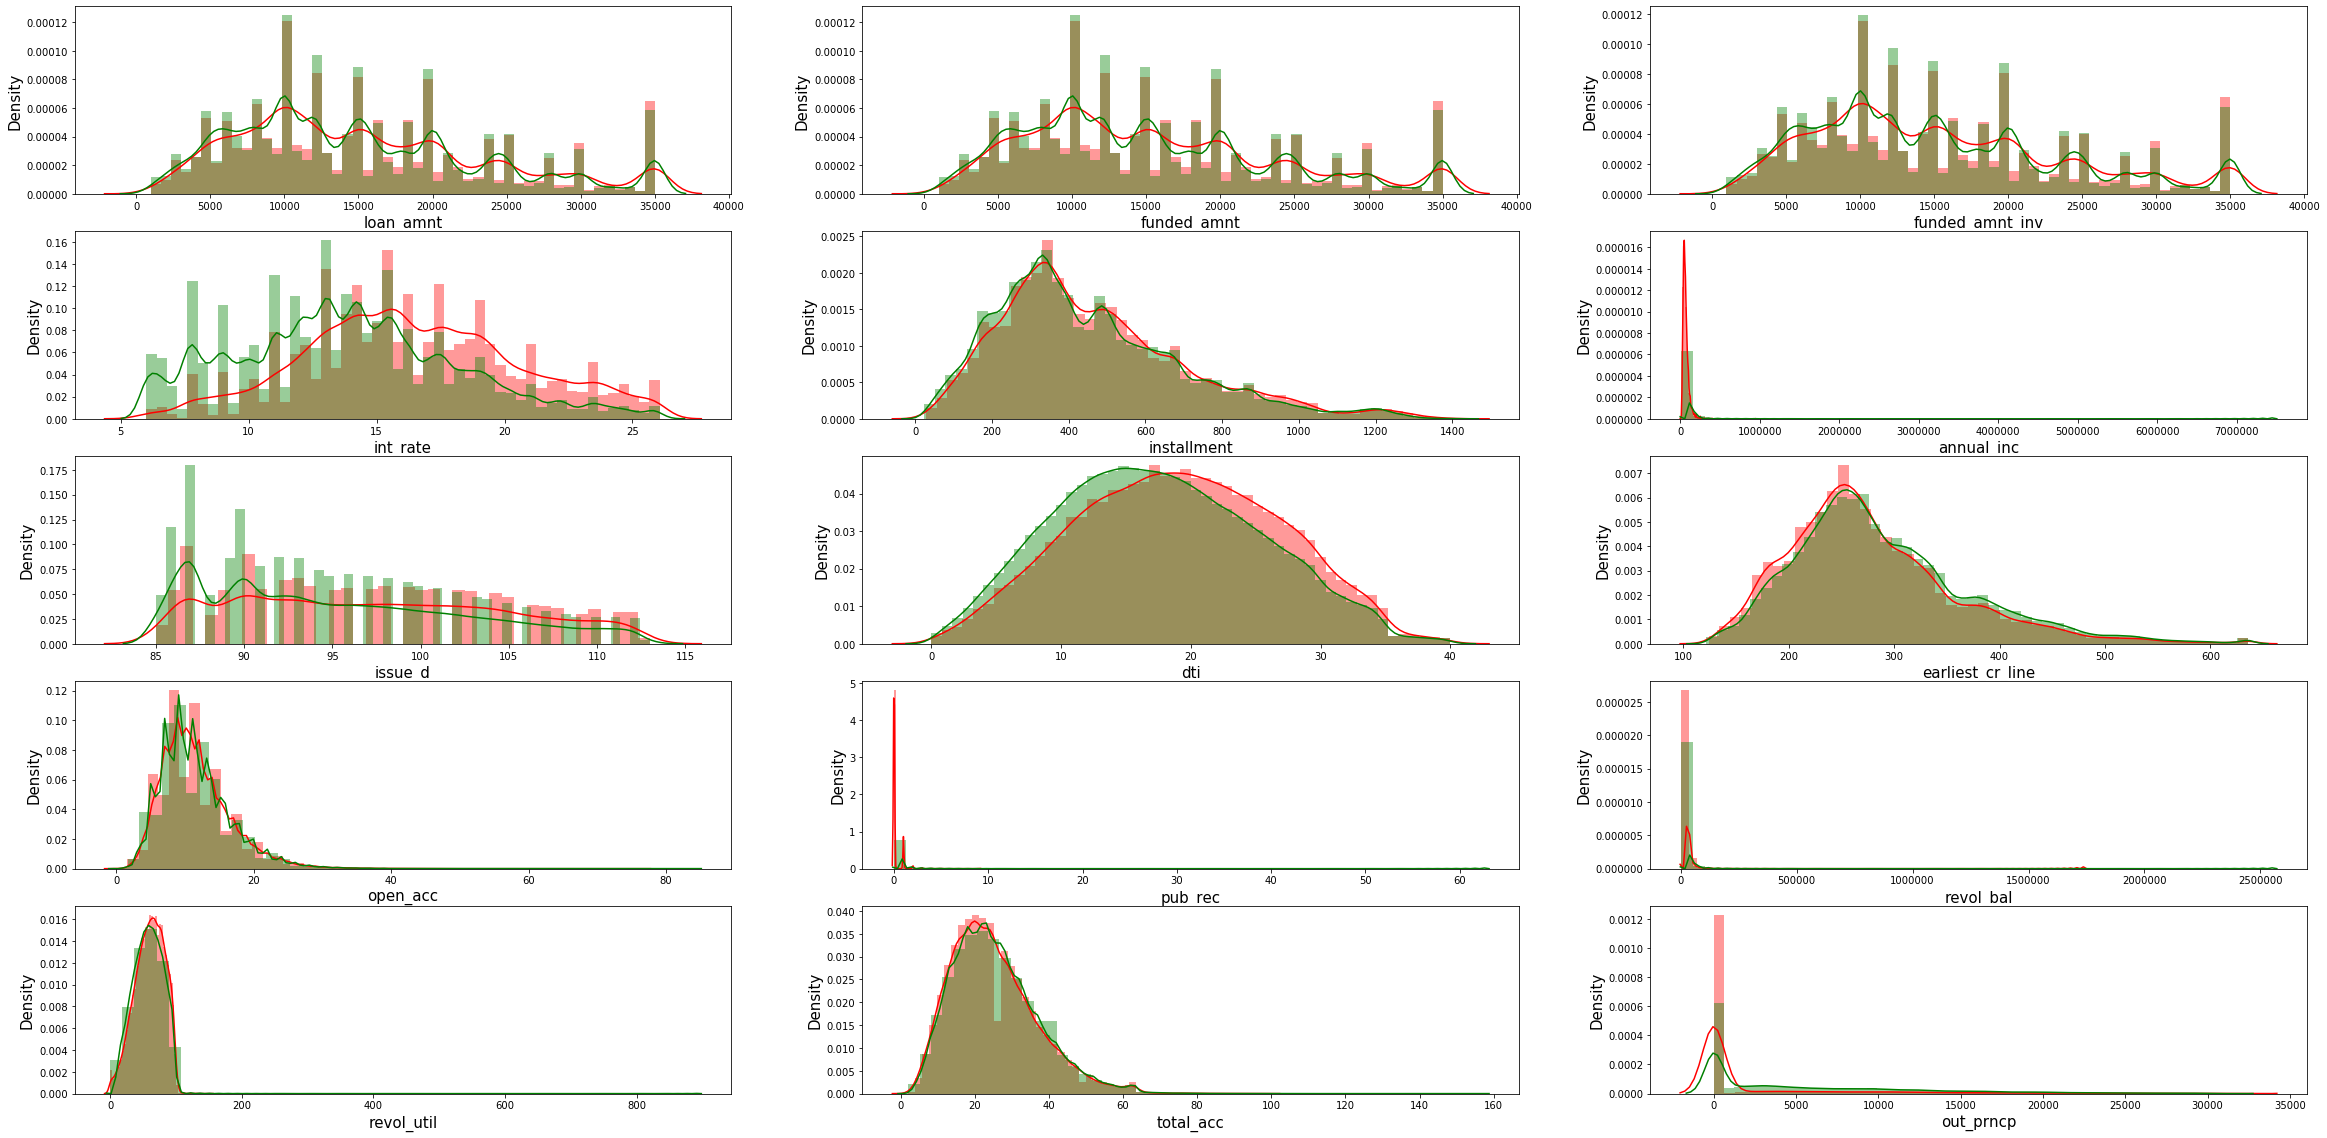

In [107]:
DSTplot(num_data_c.columns[:15].tolist())

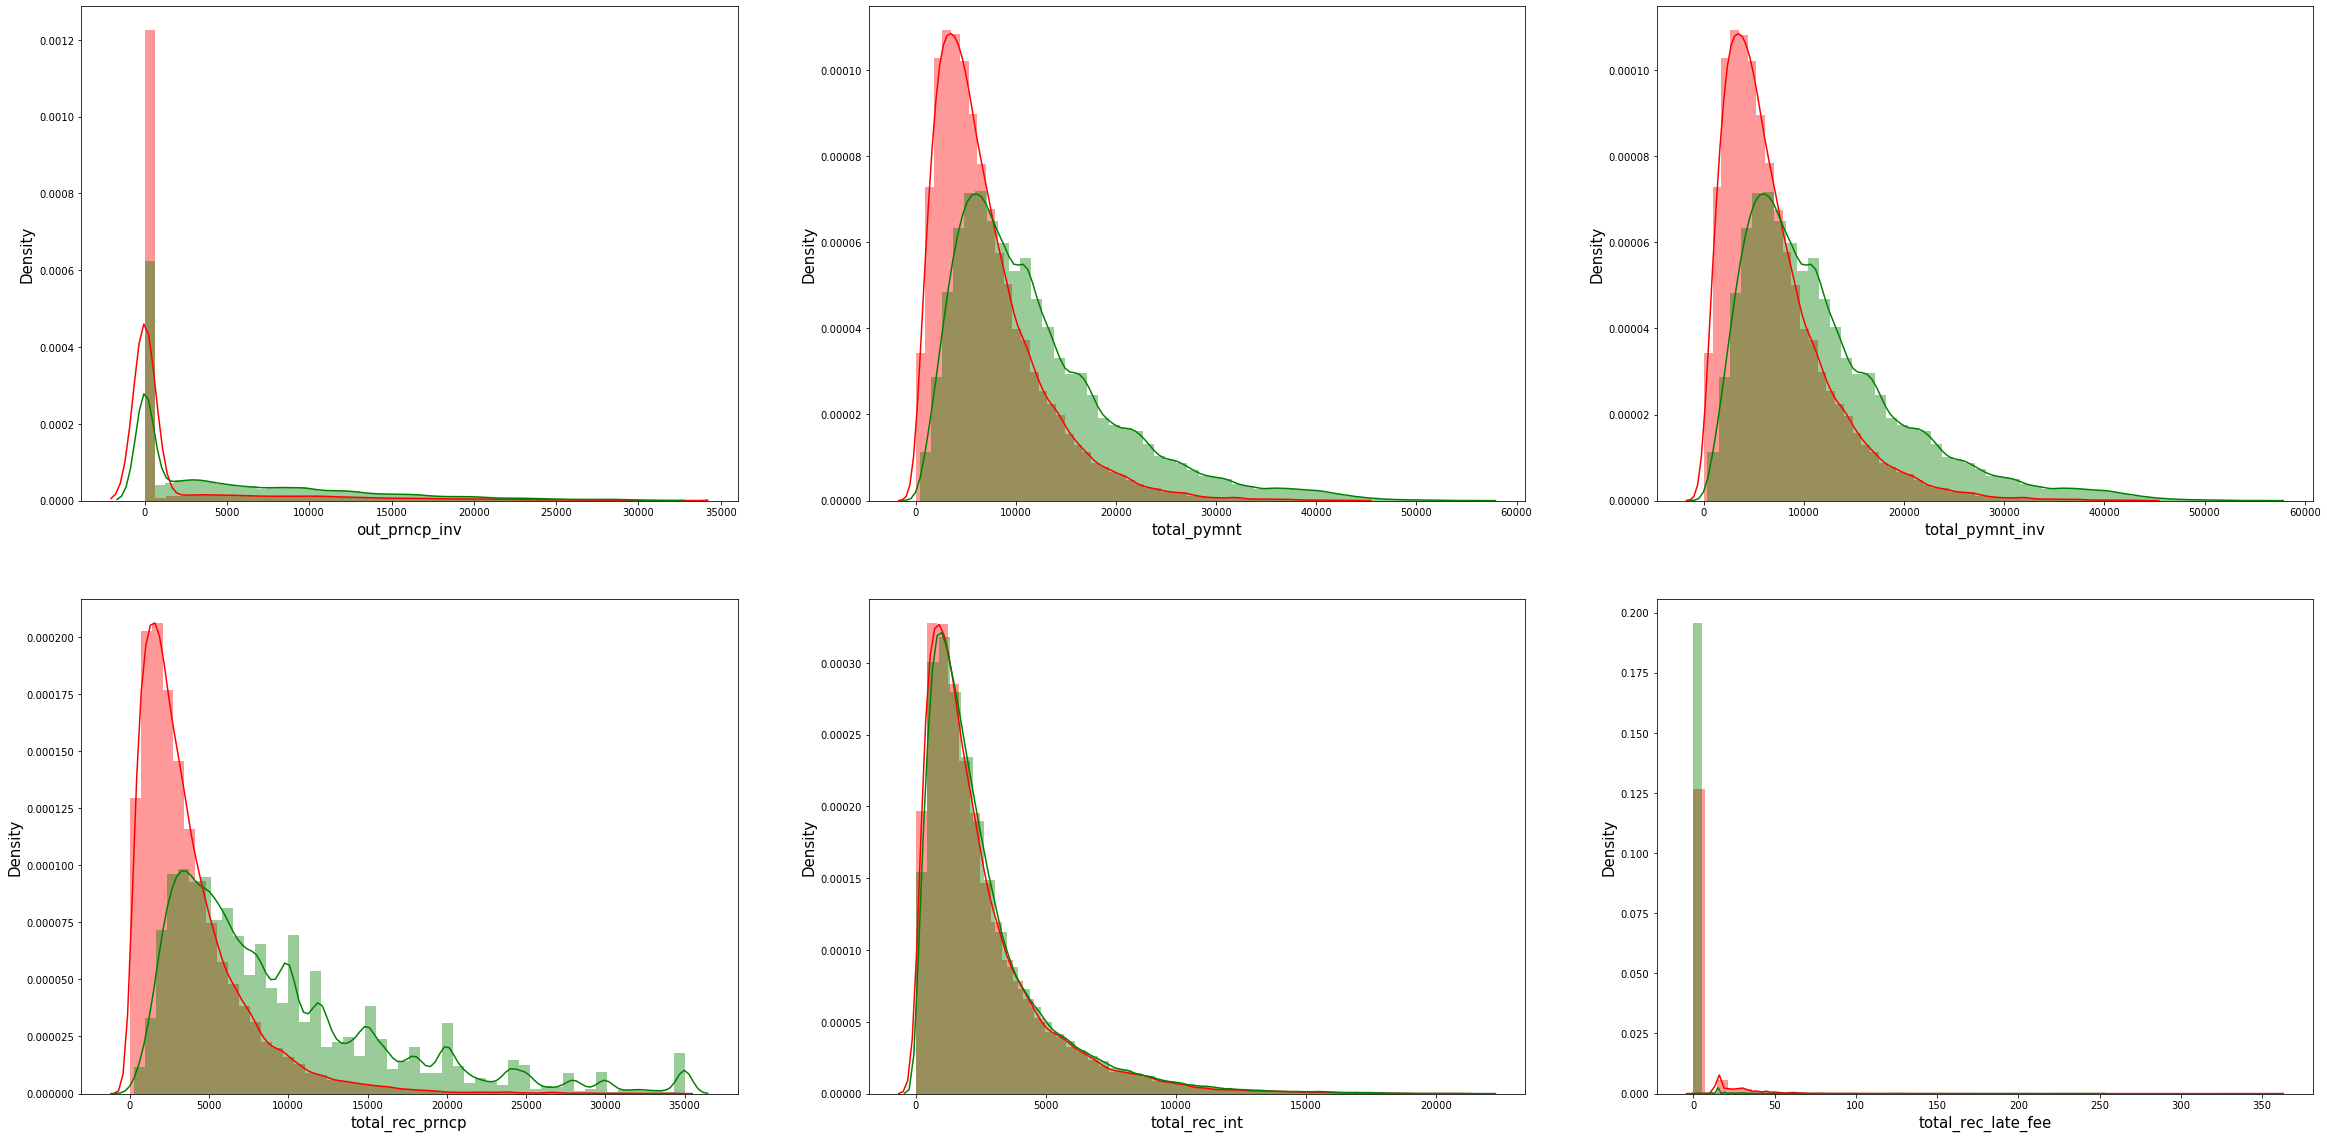

In [108]:
DSTplot(num_data_c.columns[15:22].tolist())

In [109]:
num_data_c[num_data_c.columns[22:].tolist()].describe()

,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,376775.000000,376775.000000,376775.000000,376775.000000,376775.000000,3.767750e+05,3.767750e+05,3.767750e+05
mean,8.426923,76.907876,3228.236584,74.100999,0.010619,1.889367e+02,1.411506e+05,3.056251e+04
std,73.740570,7.465341,5740.531019,5.202126,0.117485,1.499174e+04,1.533752e+05,3.769584e+04
min,0.000000,72.000000,0.010000,72.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,72.000000,324.130000,72.000000,0.000000,0.000000e+00,2.960600e+04,1.370000e+04
50%,0.000000,73.000000,550.390000,72.000000,0.000000,0.000000e+00,8.467600e+04,2.300000e+04
75%,0.000000,80.000000,3255.580000,72.000000,0.000000,0.000000e+00,2.120920e+05,3.810000e+04
max,5694.093600,112.000000,36234.440000,113.000000,20.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [140]:
num_data_c.loc[:, num_data_c.columns[:15].tolist()]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp
42535,27050,27050,27050.0,10.99,885.46,55000.0,97.0,22.87,423.0,14.0,0.0,36638,61.2,27.0,10018.90
42536,9750,9750,9750.0,13.98,333.14,26000.0,97.0,25.12,180.0,12.0,0.0,7967,52.8,28.0,3710.96
42537,12000,12000,12000.0,6.62,368.45,105000.0,97.0,14.05,334.0,12.0,0.0,13168,21.6,22.0,4266.62
42538,12000,12000,12000.0,13.53,407.40,40000.0,97.0,16.94,279.0,7.0,2.0,5572,68.8,32.0,0.00
42539,15000,15000,15000.0,8.90,476.30,63000.0,97.0,16.51,286.0,8.0,0.0,11431,74.2,29.0,5449.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,96.0,19.85,225.0,18.0,0.0,23208,77.6,36.0,12574.00
466281,22000,22000,22000.0,19.97,582.50,78000.0,96.0,18.45,295.0,18.0,1.0,18238,46.3,30.0,0.00
466282,20700,20700,20700.0,16.99,514.34,46000.0,96.0,25.65,241.0,18.0,0.0,6688,51.1,43.0,14428.31
466283,2000,2000,2000.0,7.90,62.59,83000.0,96.0,5.39,227.0,21.0,0.0,11404,21.5,27.0,0.00


In [ ]:
BOXplot(num_data_c.loc[:, num_data_c.columns[:15].tolist()])

In [ ]:
BOXplot(num_data_c.loc[:, num_data_c.columns[15:].tolist()])

In [ ]:
# BOXplot(num_data_c.loc[:, num_data_c.columns[27:].tolist()])

In [ ]:
num_data_c.columns

### Handling Outliers

In [346]:
def IQR_df(col):
    Q1 = (num_data_c[col]).quantile(0.25)
    Q3 = (num_data_c[col]).quantile(0.75)
    IQR = Q3 - Q1
    
    max_num = Q3 + (1.5*IQR)
    print(f"Nilai Maximum dari masing-masing Variable adalah: \n{max_num}")
    
    min_num = Q1 - (1.5*IQR)
    print(f"Nilai Minimum dari masing-masing Variable adalah: \n{min_num}")
    
    more_than = (num_data_c > max_num)
    lower_than = (num_data_c < min_num)
    
    return num_data[~(lower_than | more_than).any(axis=1)]

In [ ]:
loan_data_c[~['loan_amnt', 'funded_amnt', 'funded_amnt_inv','issue_d', 'dti']]

In [347]:
num_data_iqr = num_data_c.copy()
num_data_iqr = IQR_df(['loan_amnt', 'funded_amnt', 'funded_amnt_inv','issue_d', 'dti'])

Nilai Maximum dari masing-masing Variable adalah: 
loan_amnt          37250.00
funded_amnt        37250.00
funded_amnt_inv    37250.00
issue_d              119.00
dti                   40.62
dtype: float64
Nilai Minimum dari masing-masing Variable adalah: 
loan_amnt         -8750.00
funded_amnt       -8750.00
funded_amnt_inv   -8750.00
issue_d              71.00
dti                  -5.54
dtype: float64


In [358]:
num_data_iqr[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','issue_d', 'dti']]

,loan_amnt,funded_amnt,funded_amnt_inv,issue_d,dti
42535,27050,27050,27050.0,97.0,22.87
42536,9750,9750,9750.0,97.0,25.12
42537,12000,12000,12000.0,97.0,14.05
42538,12000,12000,12000.0,97.0,16.94
42539,15000,15000,15000.0,97.0,16.51
...,...,...,...,...,...
466280,18400,18400,18400.0,96.0,19.85
466281,22000,22000,22000.0,96.0,18.45
466282,20700,20700,20700.0,96.0,25.65
466283,2000,2000,2000.0,96.0,5.39


In [ ]:
BOXplot(num_data_iqr.loc[:, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','issue_d', 'dti']])

# **4. Feature Engineering**

## **Encode data kategorik**

In [ ]:
cat_data = list(loan_data.select_dtypes(include=['object']).columns)

### convert Employment Length jadi Integer

In [ ]:
loan_data['emp_length'].value_counts()

10+ years    133072
2 years       33994
3 years       30159
< 1 year      28822
5 years       24826
1 year        24073
7 years       22766
4 years       22152
6 years       21750
8 years       19617
9 years       15544
Name: emp_length, dtype: int64

In [ ]:
loan_data['emp_length'].dtypes

dtype('O')

In [ ]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
loan_data['emp_length'] = loan_data['emp_length'].astype('int')
loan_data['emp_length'].dtypes

dtype('int64')

In [ ]:
loan_data['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  5,  6,  9,  8,  0])

In [ ]:
loan_data.loc[:, cat_data]

,term,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,Team Leadern Customer Ops & Systems,OWN,Verified,n,debt_consolidation,Debt Consolidation,w
42536,36 months,C,Medical Assistant,RENT,Not Verified,n,debt_consolidation,Debt Consilation,f
42537,36 months,A,MANAGER INFORMATION DELIVERY,MORTGAGE,Not Verified,n,debt_consolidation,UNIVERSAL CARD,w
42538,36 months,B,On road manager,RENT,Source Verified,n,debt_consolidation,Debt consolidation,w
42539,36 months,A,aircraft maintenance engineer,MORTGAGE,Not Verified,n,debt_consolidation,Pay off,w
...,...,...,...,...,...,...,...,...,...
466280,60 months,C,Financial Advisor,MORTGAGE,Source Verified,n,debt_consolidation,Debt consolidation,w
466281,60 months,D,Chief of Interpretation (Park Ranger),MORTGAGE,Verified,n,debt_consolidation,Debt consolidation,f
466282,60 months,D,patrol,MORTGAGE,Verified,n,debt_consolidation,Debt consolidation,f
466283,36 months,A,Server Engineer Lead,OWN,Verified,n,credit_card,Credit card refinancing,w


### convert pymn_plan jadi Integer

In [ ]:
loan_data.loc[:, cat_data].head()

,term,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,Team Leadern Customer Ops & Systems,OWN,Verified,n,debt_consolidation,Debt Consolidation,w
42536,36 months,C,Medical Assistant,RENT,Not Verified,n,debt_consolidation,Debt Consilation,f
42537,36 months,A,MANAGER INFORMATION DELIVERY,MORTGAGE,Not Verified,n,debt_consolidation,UNIVERSAL CARD,w
42538,36 months,B,On road manager,RENT,Source Verified,n,debt_consolidation,Debt consolidation,w
42539,36 months,A,aircraft maintenance engineer,MORTGAGE,Not Verified,n,debt_consolidation,Pay off,w


In [ ]:
loan_data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [ ]:
loan_data['pymnt_plan'] = np.where(loan_data['pymnt_plan'].isin(['y']), 1, 0)

In [ ]:
loan_data.loc[:, cat_data].head()

,term,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,Team Leadern Customer Ops & Systems,OWN,Verified,0,debt_consolidation,Debt Consolidation,w
42536,36 months,C,Medical Assistant,RENT,Not Verified,0,debt_consolidation,Debt Consilation,f
42537,36 months,A,MANAGER INFORMATION DELIVERY,MORTGAGE,Not Verified,0,debt_consolidation,UNIVERSAL CARD,w
42538,36 months,B,On road manager,RENT,Source Verified,0,debt_consolidation,Debt consolidation,w
42539,36 months,A,aircraft maintenance engineer,MORTGAGE,Not Verified,0,debt_consolidation,Pay off,w


### encode data menggunakan ordinal encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
loan_data['title'] = OrdinalEncoder().fit_transform(loan_data[['title']])
loan_data['emp_title'] = OrdinalEncoder().fit_transform(loan_data[['emp_title']])
loan_data['verification_status'] = OrdinalEncoder().fit_transform(loan_data[['verification_status']])

In [ ]:
loan_data.loc[:, ['title', 'emp_title', 'verification_status']]

,title,emp_title,verification_status
42535,9134.0,126448.0,2.0
42536,9014.0,79058.0,0.0
42537,27756.0,73696.0,0.0
42538,10391.0,88048.0,1.0
42539,22192.0,142128.0,0.0
...,...,...,...
466280,10391.0,48527.0,1.0
466281,10391.0,24270.0,2.0
466282,10391.0,157554.0,2.0
466283,7943.0,114157.0,2.0


In [ ]:
loan_data.loc[:, cat_data]

,term,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status
42535,36 months,B,126448.0,OWN,2.0,0,debt_consolidation,9134.0,w
42536,36 months,C,79058.0,RENT,0.0,0,debt_consolidation,9014.0,f
42537,36 months,A,73696.0,MORTGAGE,0.0,0,debt_consolidation,27756.0,w
42538,36 months,B,88048.0,RENT,1.0,0,debt_consolidation,10391.0,w
42539,36 months,A,142128.0,MORTGAGE,0.0,0,debt_consolidation,22192.0,w
...,...,...,...,...,...,...,...,...,...
466280,60 months,C,48527.0,MORTGAGE,1.0,0,debt_consolidation,10391.0,w
466281,60 months,D,24270.0,MORTGAGE,2.0,0,debt_consolidation,10391.0,f
466282,60 months,D,157554.0,MORTGAGE,2.0,0,debt_consolidation,10391.0,f
466283,36 months,A,114157.0,OWN,2.0,0,credit_card,7943.0,w


## One hot Encoding

In [ ]:
loan_data['purpose'].value_counts()

debt_consolidation    228540
credit_card            88596
home_improvement       20292
other                  16365
major_purchase          6357
small_business          3978
medical                 3285
car                     3040
moving                  1998
vacation                1772
house                   1500
wedding                  855
renewable_energy         197
Name: purpose, dtype: int64

In [ ]:
loan_data['title'].value_counts()

10391.0    154458
7943.0      58504
15678.0     13672
21258.0     11595
9134.0      10976
            ...  
3264.0          1
2057.0          1
30333.0         1
12399.0         1
23026.0         1
Name: title, Length: 37412, dtype: int64

In [ ]:
# categorical_cols = [col for col in list(loan_data.select_dtypes(include='object').columns)]
# loan_data_onehot = pd.get_dummies(loan_data[categorical_cols], drop_first=True)

In [ ]:
# create a list of dummies of all the categorical variable
loan_data_onehot = [
    pd.get_dummies(loan_data['term'], prefix='term', prefix_sep=':'), 
    pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':'), 
    pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
    pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':'),
    pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
]

# convert dummy variable to dataframe
loan_data_onehot = pd.concat(loan_data_onehot, axis=1)
loan_data_onehot.head()

loan_data = pd.concat([loan_data, loan_data_onehot], axis=1)

In [ ]:
loan_data.drop(columns=[
    'term', 
    'grade', 
    'home_ownership',
    'purpose',
    'initial_list_status'
],
inplace=True)

## Split data

In [ ]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X.shape, y.shape

((376775, 66), (376775,))

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, 
                                                test_size=0.2, random_state=42)

In [ ]:
print('trainX: ', trainX.shape, 'trainY: ', trainY.shape, 'testX: ', testX.shape, 'testY: ', testY.shape)

trainX:  (301420, 66) trainY:  (301420,) testX:  (75355, 66) testY:  (75355,)


## Feature Scaling menggunakan MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(trainX)

MinMaxScaler()

In [ ]:
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
pd.DataFrame(trainX_scaled, columns=trainX.columns)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term: 36 months,term: 60 months,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
0,0.705882,0.705882,0.706314,0.094716,0.547331,0.119092,1.0,0.013474,1.0,0.321429,0.0,0.212317,0.359340,0.000000,0.225681,0.000,0.059524,0.000000,0.006940,0.055811,0.025974,0.411602,0.411602,0.250570,0.250749,0.336078,0.106133,0.0,0.0,0.0,0.075,0.021589,0.000000,0.0,0.0,0.000000,0.007440,0.00358,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.500000,0.500000,0.500734,0.479063,0.296200,0.892622,0.1,0.005536,0.5,0.071429,0.0,0.108818,0.457864,0.000000,0.108949,0.000,0.119048,0.000000,0.001538,0.016923,0.123377,0.462508,0.462508,0.108681,0.108759,0.089302,0.137451,0.0,0.0,0.0,0.025,0.011978,0.000000,0.0,0.0,0.000031,0.007787,0.00262,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.513235,0.513235,0.513950,0.547856,0.313817,0.171051,1.0,0.004936,0.5,0.178571,0.0,0.212317,0.472118,0.000000,0.461089,0.000,0.071429,0.000000,0.008712,0.077440,0.116883,0.456750,0.456750,0.138403,0.138502,0.107450,0.184649,0.0,0.0,0.0,0.025,0.012652,0.000000,0.0,0.0,0.000000,0.004690,0.00324,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.205882,0.205882,0.207048,0.282652,0.173934,0.760913,0.4,0.002268,0.5,0.178571,0.0,0.277753,0.611653,0.000000,0.073930,0.000,0.059524,0.000000,0.001441,0.081363,0.019481,0.000000,0.000000,0.046544,0.046578,0.055727,0.031784,0.0,0.0,0.0,0.175,0.007298,0.000000,0.0,0.0,0.000000,0.002356,0.00051,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.411765,0.411765,0.412628,0.713360,0.386932,0.973822,1.0,0.009072,1.0,0.571429,0.0,0.968565,0.186797,0.000000,0.359922,0.250,0.083333,0.015873,0.003258,0.064216,0.129870,0.000000,0.000000,0.307911,0.308131,0.428571,0.105073,0.0,0.0,0.0,0.475,0.338257,0.487805,0.0,0.0,0.000000,0.020480,0.00146,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301415,0.411765,0.411765,0.412628,0.366401,0.349520,0.760714,0.7,0.006670,1.0,0.178571,0.0,0.212317,0.258315,0.000000,0.169261,0.125,0.178571,0.031746,0.002463,0.024319,0.214286,0.256346,0.256346,0.162481,0.162597,0.193024,0.109307,0.0,0.0,0.0,0.000,0.014018,0.000000,0.0,0.0,0.000000,0.002800,0.00292,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
301416,0.852941,0.852941,0.847283,0.298604,0.701672,0.759330,1.0,0.013207,1.0,0.392857,0.0,0.212317,0.270568,0.000000,0.252918,0.000,0.059524,0.031746,0.002853,0.079794,0.025974,0.375905,0.373399,0.408173,0.405737,0.511735,0.229118,0.0,0.0,0.0,0.025,0.027495,0.048780,0.0,0.0,0.000000,0.060127,0.00103,1.0,0.0

## Feature Selection menggunakan SelectKBest regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
select_reg = SelectKBest(k=10, score_func=f_regression)
select_reg.fit(trainX_scaled, trainY)               

trainX_new = select_reg.transform(trainX_scaled)         
testX_new = select_reg.transform(testX_scaled)

trainX_new.shape, testX_new.shape

((301420, 10), (75355, 10))

In [ ]:
kept_features = pd.DataFrame({'columns': trainX.columns,
                              'Kept': select_reg.get_support(),
                              'score': select_reg.scores_})
kept_features.set_index("columns")

,Kept,score
columns,,
loan_amnt,False,98.102704
funded_amnt,False,97.988711
funded_amnt_inv,False,98.083240
int_rate,True,10556.218418
installment,False,165.647762
...,...,...
purpose:small_business,False,253.791871
purpose:vacation,False,0.223927
purpose:wedding,False,4.997655


In [ ]:
new_df = trainX.iloc[:,select_reg.get_support()]
new_df

,int_rate,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
426619,7.90,14080.68000,14080.68,11762.73,0.0,0.0,0.0,75.0,782.26,72.0
276317,15.61,6127.52000,6127.52,3125.58,0.0,0.0,0.0,73.0,434.01,72.0
350733,16.99,7793.48000,7793.48,3760.74,0.0,0.0,0.0,73.0,458.44,72.0
334359,11.67,2644.60000,2644.60,1950.44,0.0,0.0,0.0,79.0,264.46,72.0
110463,20.31,17294.78884,17294.79,15000.00,0.0,0.0,0.0,91.0,12256.56,92.0
...,...,...,...,...,...,...,...,...,...,...
342371,13.35,9143.10000,9143.10,6755.83,0.0,0.0,0.0,72.0,507.95,72.0
454689,11.99,22914.67000,22761.91,17910.74,0.0,0.0,0.0,73.0,996.29,74.0
180634,12.12,9740.43000,9740.43,9000.00,0.0,0.0,0.0,100.0,7345.28,72.0
196220,14.09,14604.73868,14604.74,12000.00,0.0,0.0,0.0,84.0,3940.84,72.0


In [ ]:
new_df.shape

(301420, 10)

In [ ]:
new_df.describe()

,int_rate,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
count,301420.000000,301420.000000,301420.00000,301420.000000,301420.000000,301420.000000,301420.000000,301420.000000,301420.000000,301420.000000
mean,14.038173,11457.416603,11451.83980,8738.268680,0.545733,80.454046,8.396618,76.909545,3230.253976,74.097459
std,4.385740,8082.776138,8078.42496,7000.889672,4.866223,525.883268,73.689081,7.464232,5748.953392,5.194683
min,6.000000,35.690000,35.69000,0.000000,0.000000,0.000000,0.000000,72.000000,0.010000,72.000000
25%,10.990000,5600.777500,5598.61000,3656.662500,0.000000,0.000000,0.000000,72.000000,324.732500,72.000000
50%,13.980000,9380.740000,9373.93500,6605.340000,0.000000,0.000000,0.000000,73.000000,550.390000,72.000000
75%,16.990000,15150.742500,15144.58000,11797.882500,0.000000,0.000000,0.000000,80.000000,3240.442500,72.000000
max,26.060000,56087.909920,56047.85000,35000.000000,294.680000,33520.270000,5694.093600,112.000000,36234.440000,113.000000


# **5. Training Model**

In [ ]:
(trainX_new.shape, trainY.shape),(testX_new.shape, testY.shape)

(((301420, 10), (301420,)), ((75355, 10), (75355,)))

In [181]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Tanpa parameter tunning

In [184]:
knn.fit(trainX_new, trainY)
y_pred = knn.predict(testX_new)


print(classification_report(testY, y_pred))
print(f"Train score = {knn.score(trainX_new, trainY)}, Test score = {knn.score(testX_new, testY)}")
print(f"ROC AUC = {roc_auc_score(testY, y_pred)}")

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7612
           1       0.99      0.99      0.99     67743

    accuracy                           0.98     75355
   macro avg       0.96      0.93      0.94     75355
weighted avg       0.98      0.98      0.98     75355

Train score = 0.985671156525778, Test score = 0.9804525247163427
ROC AUC = 0.933621741357822


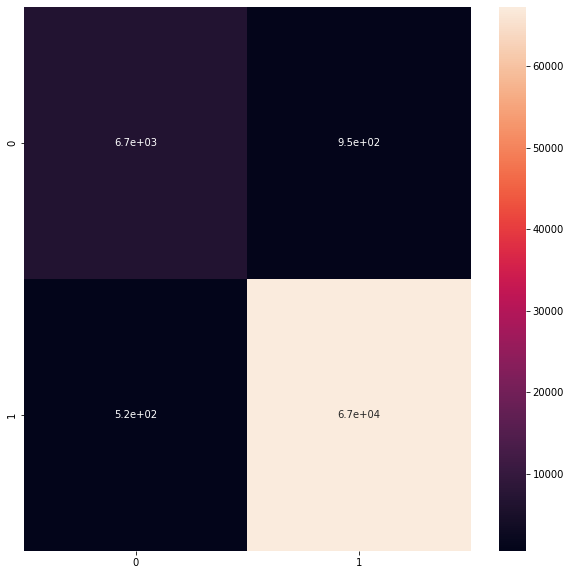

In [185]:
c = confusion_matrix(y_true=testY, y_pred=y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(c, annot=True)
plt.show()

### parameter tunning menggunakan GridSearch

In [169]:
## dengan parameter tunning
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 10))
distances = [1, 2, 3]
param_grid = dict(n_neighbors=k_range, p=distances)

grid = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1, verbose=1)  
grid_search = grid.fit(trainX_new, trainY)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


0.932373007008366

In [186]:
y_pred_grid = grid_search.predict(testX_new)

print(classification_report(testY, y_pred_grid))
print(f"Train score = {grid_search.score(trainX_new, trainY)}, Test score = {grid_search.score(testX_new, testY)}")
print(f"ROC AUC = {roc_auc_score(testY, y_pred_grid)}")

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      7612
           1       0.99      0.99      0.99     67743

    accuracy                           0.98     75355
   macro avg       0.96      0.93      0.95     75355
weighted avg       0.98      0.98      0.98     75355

Train score = 0.9887996815075311, Test score = 0.9811425917324663
ROC AUC = 0.932373007008366


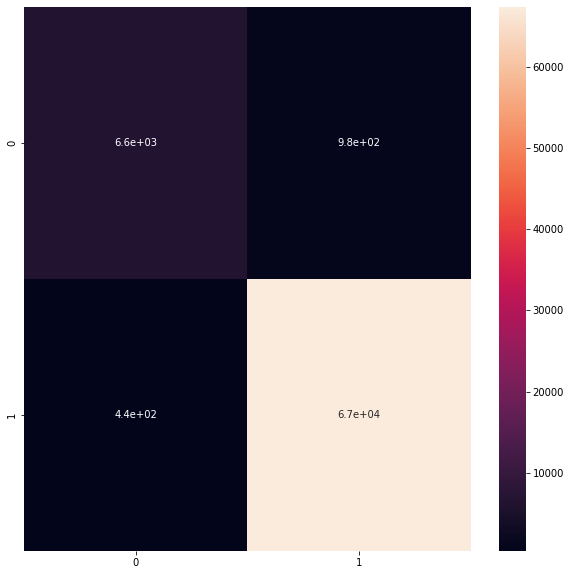

In [183]:
c = confusion_matrix(y_true=testY, y_pred=y_pred_grid)

plt.figure(figsize=(10, 10))
sns.heatmap(c, annot=True)
plt.show()

In [187]:
print(f"Best Parameter = {grid_search.best_params_, grid_search.best_score_}")

Best Parameter = ({'n_neighbors': 3, 'p': 1}, 0.9809568033247923)


In [172]:
pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.713540,0.040952,23.614803,1.856715,3,1,"{'n_neighbors': 3, 'p': 1}",0.981299,0.980602,0.980970,0.980957,0.000285,1
7,0.706199,0.044134,17.969379,0.947554,3,2,"{'n_neighbors': 3, 'p': 2}",0.980612,0.980134,0.981030,0.980592,0.000366,2
12,0.793212,0.031106,29.984391,2.809165,5,1,"{'n_neighbors': 5, 'p': 1}",0.980642,0.980502,0.980353,0.980499,0.000118,3
8,0.722162,0.034336,86.953971,1.901297,3,3,"{'n_neighbors': 3, 'p': 3}",0.980264,0.979965,0.980532,0.980253,0.000232,4
15,0.765407,0.037062,31.153760,1.192875,6,1,"{'n_neighbors': 6, 'p': 1}",0.980144,0.980034,0.980184,0.980121,0.000063,5
13,0.792523,0.052645,20.761018,1.654663,5,2,"{'n_neighbors': 5, 'p': 2}",0.980283,0.979746,0.980074,0.980035,0.000221,6
18,0.739525,0.038357,31.268279,0.976527,7,1,"{'n_neighbors': 7, 'p': 1}",0.980015,0.979855,0.979686,0.979852,0.000134,7
14,0.743390,0.011555,101.992833,3.185749,5,3,"{'n_neighbors': 5, 'p': 3}",0.979945,0.979786,0.979656,0.979796,0.000118,8
9,0.786762,0.037185,29.558849,2.684492,4,1,"{'n_neighbors': 4, 'p': 1}",0.980094,0.979477,0.979815,0.979796,0.000252,9
21,0.794582,0.005370,34.504994,1.980003,8,1,"{'n_neighbors': 8, 'p': 1}",0.979577,0.979626,0.979636,0.979613,0.000026,10


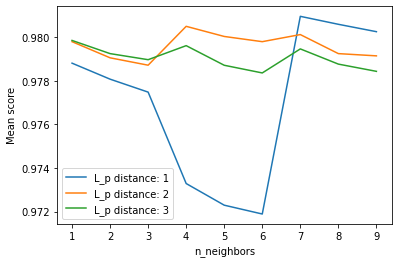

In [177]:
scores = [x for x in grid_search.cv_results_["mean_test_score"]]
scores = np.array(scores).reshape(len(distances), len(k_range))

for ind, i in enumerate(distances):
    plt.plot(k_range, scores[ind], label='L_p distance: ' + str(i))
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Mean score')
plt.show()